Text(0.5, 1.0, 'LDA and boundaries')

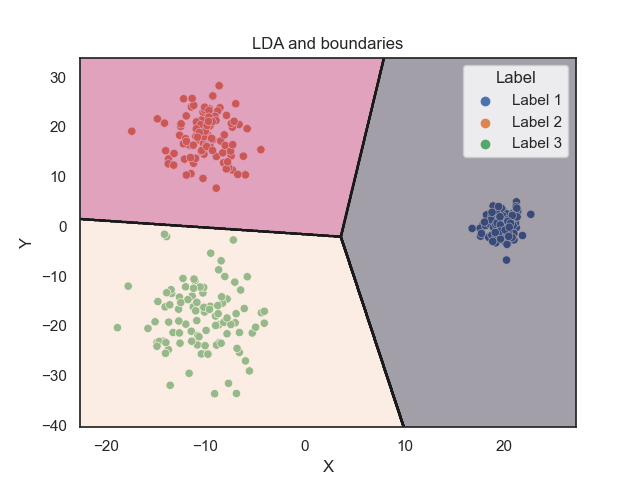

In [13]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

N_class = 3
N_points = 100
N_sample = 1000

R = 20
phi = 2 * np.pi / N_class

label_list = ["Label {}".format(index+1) for index in range(N_class)]
mu_list = [[R * np.cos(phi * index) for index in range(N_class)], [R * np.sin(phi * index) for index in range(N_class)]]
sigma_list = [[index + 1 for index in range(N_class)], [2 * (index + 1) for index in range(N_class)]]

X = np.vstack([np.hstack([np.random.randn(N_points) * sigma + mu for mu, sigma in zip(mu_list[index], sigma_list[index])]) for index in range(2)]).T
y = np.array(list(itertools.chain(*[[label_list[index]] * N_points for index in range(N_class)])))

lda_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("lda_clf", LinearDiscriminantAnalysis()),])
lda_clf.fit(X, y)

df = pd.DataFrame(data=X, columns=["x", "y"])
df["Label"] = y

margin = 0.2
x_min, x_max, y_min, y_max = np.min(X[:, 0]), np.max(X[:, 0]), np.min(X[:, 1]), np.max(X[:, 1])
x_sample_min, x_sample_max, y_sample_min, y_sample_max = x_min - np.abs(x_min) * margin, x_max + np.abs(x_max) * margin, y_min - np.abs(y_min) * margin, y_max + np.abs(y_max) * margin

xx_sample, yy_sample = np.meshgrid(np.linspace(x_sample_min, x_sample_max, N_sample), np.linspace(y_sample_min, y_sample_max, N_sample))
zz_sample = OrdinalEncoder().fit_transform(lda_clf.predict(np.vstack([np.ravel(xx_sample), np.ravel(yy_sample)]).T)[:, np.newaxis]).reshape(xx_sample.shape)


%matplotlib ipympl
sns.set_theme(style="white")
figure = sns.scatterplot(data=df, x="x", y="y", hue="Label")
ax = plt.gca()
ax.contourf(xx_sample, yy_sample, zz_sample, alpha =0.4)
ax.contour(xx_sample, yy_sample, zz_sample, alpha=1, colors="k")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('LDA and boundaries')

Text(0.5, 1.0, 'LDA and boundaries')

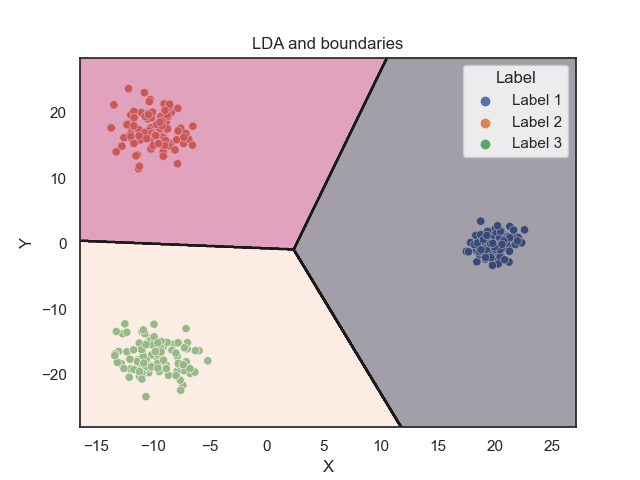

In [30]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal


class LinearDiscrimiantAnalysis:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.mean_dct = {}
        self.cov_dct = {}
        cov_list = []
        for label in np.unique(y):
            self.mean_dct[label] = np.mean(X[y==label], axis=0)
            cov_list.append(np.cov(X[y==label].T))
        cov = np.mean(np.array(cov_list), axis=0)
        for label in self.mean_dct.keys():
            self.cov_dct[label] = cov
    def predict(self, X):
        label_lst = []
        for x in X:
            prob_dct = {}
            for category, mean, cov in zip(self.mean_dct.keys(), self.mean_dct.values(), self.cov_dct.values()):
                prob_dct[category] = multivariate_normal.pdf(x, mean=mean, cov=cov)
            label_lst.append(max(prob_dct, key=prob_dct.get))
        return np.array(label_lst)

N_class = 3
N_points = 100
N_sample = 1000

R = 20
phi = 2 * np.pi / N_class

label_list = ["Label {}".format(index+1) for index in range(N_class)]
mean_list = [[R * np.cos(phi * index), R * np.sin(phi * index)] for index in range(N_class)]
cov_list = [np.array([[index + 1, 0], [0, 2*(index + 1)]]) for index in range(N_class)]

X_list = [np.random.multivariate_normal(mean=mean, cov=cov, size=N_points) for mean, cov in zip(mean_list, cov_list)]
X = np.vstack(X_list)
y = np.array(list(itertools.chain(*[[label_list[index]] * N_points for index in range(N_class)])))
df = pd.DataFrame(data=X, columns=["x", "y"])
df["Label"] = y

lda_clf = LinearDiscrimiantAnalysis(X, y)

margin = 0.2
x_min, x_max, y_min, y_max = np.min(X[:, 0]), np.max(X[:, 0]), np.min(X[:, 1]), np.max(X[:, 1])
x_sample_min, x_sample_max, y_sample_min, y_sample_max = x_min - np.abs(x_min) * margin, x_max + np.abs(x_max) * margin, y_min - np.abs(y_min) * margin, y_max + np.abs(y_max) * margin

xx_sample, yy_sample = np.meshgrid(np.linspace(x_sample_min, x_sample_max, N_sample), np.linspace(y_sample_min, y_sample_max, N_sample))
zz_sample = OrdinalEncoder().fit_transform(lda_clf.predict(np.vstack([np.ravel(xx_sample), np.ravel(yy_sample)]).T)[:, np.newaxis]).reshape(xx_sample.shape)

%matplotlib ipympl
sns.set_theme(style="white")
figure = sns.scatterplot(data=df, x="x", y="y", hue="Label")
ax = plt.gca()
ax.contourf(xx_sample, yy_sample, zz_sample, alpha =0.4)
ax.contour(xx_sample, yy_sample, zz_sample, alpha=1, colors="k")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('LDA and boundaries')